# Customer Segmentation Analysis: Uncovering Insights and Patterns for Business Optimization

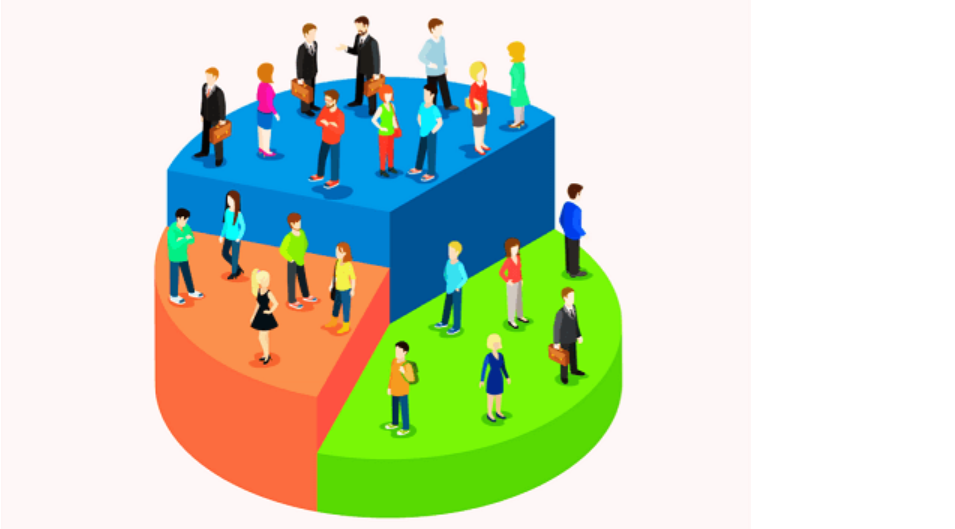

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

# Reading the Data
**Data is available in CSV file**

In [2]:
data = pd.read_csv('Mall_Customer.csv')

In [3]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
# Total rows and columns 
data.shape

(200, 5)

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Variable Identification

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Finding Null Values
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
from sklearn.cluster import KMeans

# Select the relevant features for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Set the number of clusters
n_clusters = 5

# Fit the K-means model to the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Obtain the cluster labels
labels = kmeans.labels_

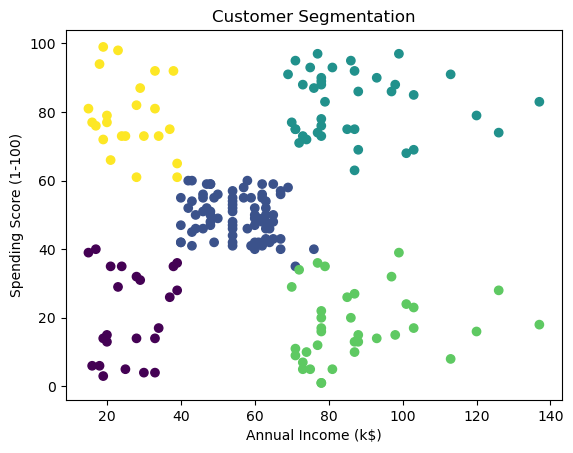

In [10]:
# Plot the clusters
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.show()

In [11]:
# Add the cluster labels to the dataset
data['Cluster'] = labels

# Analyze the segments
segment_data = data.groupby('Cluster').mean()
print(segment_data)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         23.000000  45.217391           26.304348               20.913043
1         86.265823  43.088608           55.291139               49.569620
2        162.000000  32.692308           86.538462               82.128205
3        163.500000  40.666667           87.750000               17.583333
4         24.000000  25.521739           26.304348               78.565217


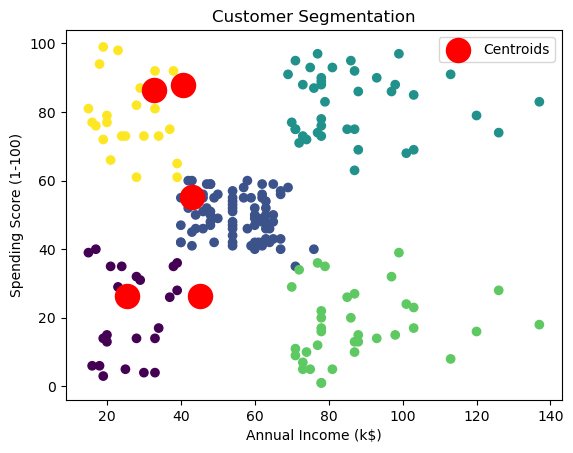

In [12]:
# Plot the clusters with centroids
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

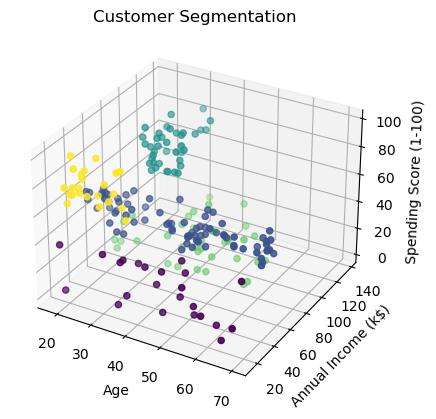

In [13]:
from mpl_toolkits import mplot3d

# Create a 3D scatter plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'], c=labels, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segmentation')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

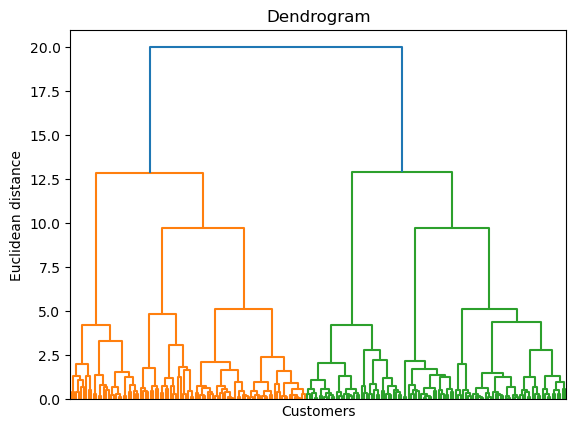

In [15]:
# Select the relevant features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform hierarchical clustering with the 'ward' method (Euclidean distance metric)
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distance")
plt.tick_params(axis='x',labelbottom=False);
plt.show()

In [16]:
from sklearn.decomposition import PCA

In [17]:
# Preprocess the data
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

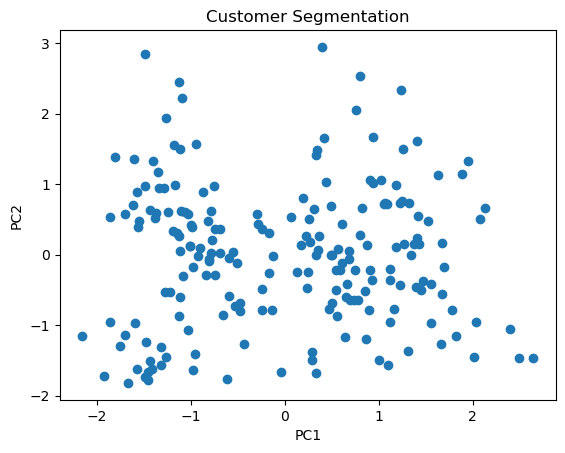

In [19]:
# Add the PCA components to the dataset
data['PC1'] = X_pca[:, 0]
data['PC2'] = X_pca[:, 1]

# Visualize the segments
plt.scatter(data['PC1'], data['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Customer Segmentation')
plt.show()

**The customer segmentation analysis project using Python revealed valuable insights. Here is a summary of the findings:**

**K-means Clustering: The K-means algorithm was applied to cluster customers based on their age, annual income, and spending score. By setting the number of clusters to 5, distinct segments of customers were identified. The scatter plot visualization helped understand the distribution of customers within each cluster.**

**Hierarchical Clustering: The hierarchical clustering algorithm, with the ward method and Euclidean distance metric, was utilized. The dendrogram provided insights into the hierarchical structure of the data, showcasing the linkage between different clusters and the Euclidean distances between them.**

**Principal Component Analysis (PCA): PCA was performed to reduce the dimensionality of the data and visualize customer segments in a two-dimensional space. By representing customers based on the first two principal components, patterns and relationships among the segments were observed.**

**The obtained customer segments enable businesses to gain a deeper understanding of their customer base. This understanding allows for personalized marketing strategies, improved customer satisfaction, and optimized business strategies. By tailoring their offerings to specific segments, businesses can effectively target customers and enhance their overall performance.**

**It is important to note that these conclusions are based on the specific dataset and context of the project. Adjustments and further analysis may be required based on the unique characteristics and goals of the business.**







